In [106]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

In [11]:
features = ['floor_area', 'latitude', 'bedrooms', 'garage', 'bathrooms', 'nearest_stn_dist', 'build_year', 'longitude', 'nearest_sch_rank', 'nearest_sch_dist', 'cbd_dist', 'land_area']

claremont = pd.read_csv('claremont.csv')

X = claremont[features]
y = claremont['price']

In [14]:
x_scaled = (X - X.mean()) / (X.std())

In [15]:
x_scaled.head()

,floor_area,latitude,bedrooms,garage,bathrooms,nearest_stn_dist,build_year,longitude,nearest_sch_rank,nearest_sch_dist,cbd_dist,land_area
0,-0.286135,-0.752412,0.832531,-0.134562,-1.414214,0.070092,-2.042878,-0.759631,-0.622852,-1.901748,0.800261,1.290511
1,0.204742,-0.510420,-0.505465,-0.134562,0.000000,-1.693943,0.623378,-1.688380,2.880689,-1.663718,1.406519,-0.595803
2,2.684300,0.480809,0.832531,1.883871,2.828427,-0.389208,1.111566,0.945421,-0.622852,1.429388,-0.897262,-0.137581
3,0.871831,0.468507,0.832531,-0.134562,0.000000,-0.389208,1.111566,0.945436,-0.622852,1.414955,-0.897262,-0.137581
4,-0.349068,0.994415,0.832531,-0.134562,0.000000,-1.616716,0.811143,0.793814,0.211325,1.054344,-1.018513,-0.277308


# Null Model

In [17]:
average_house_price = claremont['price'].mean()

In [20]:
print('${:,.2f}'.format(average_house_price))

$1,273,417.51


In [24]:
print("$" + format(average_house_price, ",.2f"))

$1,273,417.51


# First Feature

In [25]:
x_scaled.head()

,floor_area,latitude,bedrooms,garage,bathrooms,nearest_stn_dist,build_year,longitude,nearest_sch_rank,nearest_sch_dist,cbd_dist,land_area
0,-0.286135,-0.752412,0.832531,-0.134562,-1.414214,0.070092,-2.042878,-0.759631,-0.622852,-1.901748,0.800261,1.290511
1,0.204742,-0.510420,-0.505465,-0.134562,0.000000,-1.693943,0.623378,-1.688380,2.880689,-1.663718,1.406519,-0.595803
2,2.684300,0.480809,0.832531,1.883871,2.828427,-0.389208,1.111566,0.945421,-0.622852,1.429388,-0.897262,-0.137581
3,0.871831,0.468507,0.832531,-0.134562,0.000000,-0.389208,1.111566,0.945436,-0.622852,1.414955,-0.897262,-0.137581
4,-0.349068,0.994415,0.832531,-0.134562,0.000000,-1.616716,0.811143,0.793814,0.211325,1.054344,-1.018513,-0.277308


In [49]:
scores = []

for predictor in x_scaled.columns:
    X_train = x_scaled.loc[: , [predictor]]

    model = LinearRegression()
    model.fit(X_train, y)

    y_pred = model.predict(X_train)
    mse = np.mean((y_pred - y) ** 2)
    
    scores.append((mse, predictor))
    
best_mse, best_predictor = sorted(scores)[0]

In [50]:
best_mse, best_predictor

(95814894534.16367, 'floor_area')

# Forward Selection

In [91]:
remaining_features = list(x_scaled.columns)
forward_selected_predictor = []
forward_mse = []

n = len(remaining_features)

for i in range(n):
    scores = []
    # print(forward_selected_predictor)
    
    for predictor in remaining_features:
        X_train = x_scaled.loc[: , forward_selected_predictor + [predictor]]

        model = LinearRegression()
        model.fit(X_train, y)

        y_pred = model.predict(X_train)
        mse = np.mean((y_pred - y) ** 2)

        scores.append((mse, predictor))

    best_mse, best_predictor = sorted(scores)[0]
    remaining_features.remove(best_predictor)
    
    forward_selected_predictor.append(best_predictor)
    forward_mse.append(best_mse)
    # print(best_predictor, ":", best_mse)

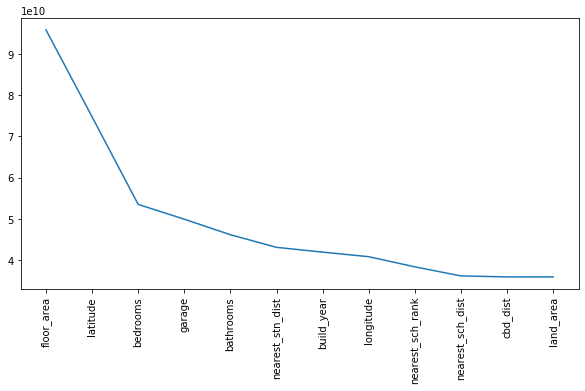

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(forward_mse)

x_pos = np.arange(len(forward_mse))
plt.xticks(x_pos, forward_selected_predictor, rotation=90);

In [96]:
from sklearn.preprocessing import RobustScaler

In [100]:
x = np.array([1, 2, 3, 100]).reshape(-1, 1)

In [111]:
scaler = RobustScaler()
scaler.fit(x)

out = scaler.transform(x)

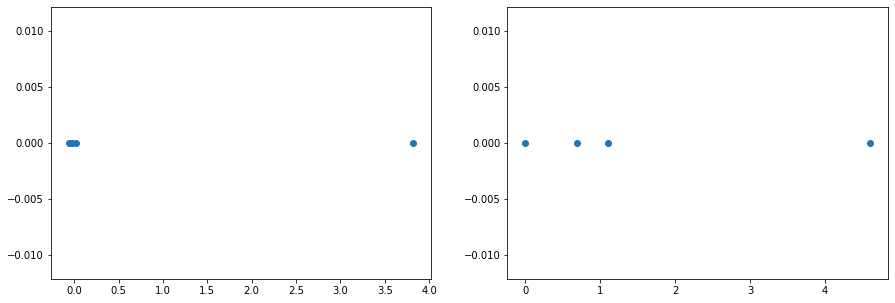

In [112]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(out, np.zeros(4))

plt.subplot(1, 2, 2)
# plt.scatter((x - np.mean(x))/np.std(x), np.zeros(4))
plt.scatter(np.log(x), np.zeros(4))

# Forward Selection via CV

In [118]:
remaining_features = list(x_scaled.columns)
forward_selected_predictor = []
forward_mse = []

n = len(remaining_features)

for i in range(n):
    scores = []
    # print(forward_selected_predictor)
    
    for predictor in remaining_features:
        X_train = x_scaled.loc[: , forward_selected_predictor + [predictor]]

        model = LinearRegression()
        
        cv_scores = cross_val_score(model, X_train, y, cv=5, scoring="neg_mean_squared_error")
        
        average_neg_mse = np.mean(cv_scores)
        scores.append((-average_neg_mse, predictor))

    best_mse, best_predictor = sorted(scores)[0]
    remaining_features.remove(best_predictor)
    
    forward_selected_predictor.append(best_predictor)
    forward_mse.append(best_mse)
    # print(best_predictor, ":", best_mse)

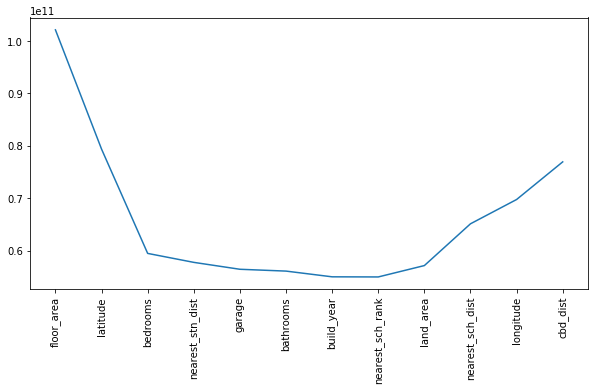

In [119]:
plt.figure(figsize=(10, 5))
plt.plot(forward_mse)

x_pos = np.arange(len(forward_mse))
plt.xticks(x_pos, forward_selected_predictor, rotation=90);

In [120]:
np.argmin(forward_mse)

7

In [121]:
forward_selected_predictor[np.argmin(forward_mse)]

'nearest_sch_rank'

In [122]:
import matplotlib
import folium
import branca

In [124]:
price = claremont['price']
colormap = branca.colormap.linear.YlOrRd_09.scale(min(price), max(price))

folium_map = folium.Map(location=(-31.98, 115.78), zoom_start=14)

for i in range(len(claremont)):
    values = claremont.iloc[i, :]
    lat = values["latitude"]
    lon = values["longitude"]
    price = values["price"]

    color = colormap(price)
    folium.CircleMarker([lat, lon], radius=3, color=color,
                        fill=True, fill_opacity=0.7).add_to(folium_map)
    
folium_map.add_child(colormap)
folium_map